In [22]:
from keras.models import Model, load_model
from keras.layers import Dense, Flatten, Input
from keras.layers import Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [11]:
IM_SIZE = 128

#Create model
input = Input(shape = (IM_SIZE,IM_SIZE,3))
conv1 = Conv2D(32,3,activation='relu')(input)
pool1 = MaxPool2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(32,3,activation='relu')(pool1)
pool2 = MaxPool2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(64,3,activation='relu')(pool2)
pool3 = MaxPool2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(64,3,activation='relu')(pool3)
pool4 = MaxPool2D(pool_size=(2, 2))(conv4)
conv5 = Conv2D(128,3,activation='relu')(pool4)
pool5 = MaxPool2D(pool_size=(2, 2))(conv5)
flat = Flatten()(pool5)
hidden = Dense(128, activation='relu')(flat)
output = Dense(3, activation='softmax')(hidden)
model = Model(inputs=input, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()


Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 14, 14, 64)       

In [12]:
datagen = ImageDataGenerator(rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
validation_split=0.1)

In [13]:
train_generator = datagen.flow_from_directory(
    'eiei/',
    shuffle=True,
    target_size=(IM_SIZE,IM_SIZE),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

Found 1970 images belonging to 3 classes.


In [14]:
validation_generator = datagen.flow_from_directory(
    'eiei/',
    shuffle=False,
    target_size=(IM_SIZE,IM_SIZE),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)
print('Train',train_generator)
print('Validation',validation_generator)

Found 218 images belonging to 3 classes.
Train <tensorflow.python.keras.preprocessing.image.DirectoryIterator object at 0x7ffcdd432cd0>
Validation <tensorflow.python.keras.preprocessing.image.DirectoryIterator object at 0x7ffcdd5bc6a0>


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
62/62 [==============================] - ETA: 0s - loss: 0.6350 - acc: 0.7020
Epoch 00001: val_acc improved from -inf to 0.94037, saving model to eiei4.h5
62/62 [==============================] - 26s 413ms/step - loss: 0.6350 - acc: 0.7020 - val_loss: 0.1888 - val_acc: 0.9404
Epoch 2/50
62/62 [==============================] - ETA: 0s - loss: 0.2258 - acc: 0.9208
Epoch 00002: val_acc did not improve from 0.94037
62/62 [==============================] - 26s 424ms/step - loss: 0.2258 - acc: 0.9208 - val_loss: 0.2000 - val_acc: 0.8991
Epoch 3/50
62/62 [==============================] - ETA: 0s - loss: 0.1761 - acc: 0.9391
Epoch 00003: val_acc improved from 0.94037 to 0.95872, saving model to eiei4.h5
62/62 [==============================] - 23s 371ms/step - loss: 0.1761 - acc: 0.9391 - val_loss: 0.1247 - val_acc: 0.9587
Epoch 4/50
62/62 [==============================] - ETA: 0s - loss: 0.1143 - acc: 0.

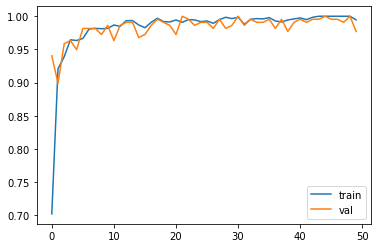

In [15]:
#Train Model
checkpoint = ModelCheckpoint('eiei4.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='max')
h = model.fit_generator(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint])

plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['train', 'val'])

In [53]:
#Test Model
model = load_model('eiei4.h5')
score = model.evaluate_generator(
    validation_generator,
    steps=len(validation_generator))
print('score (cross_entropy, accuracy):\n',score)

score (cross_entropy, accuracy):
 [0.009056737646460533, 0.9954128265380859]


In [54]:
predict = model.predict_generator(
    validation_generator,
    steps=len(validation_generator),
    workers = 1,
    use_multiprocessing=False)
print('confidence:\n', predict)

confidence:
 [[9.99999881e-01 1.00502417e-09 6.88797286e-08]
 [9.99969959e-01 1.87150349e-07 2.98201358e-05]
 [8.68376374e-01 1.02801152e-01 2.88224705e-02]
 [9.99999285e-01 1.20355693e-07 5.59390344e-07]
 [9.99996543e-01 1.06819272e-07 3.30254943e-06]
 [9.99351323e-01 1.43830417e-04 5.04902157e-04]
 [9.96845126e-01 7.39992975e-05 3.08088399e-03]
 [8.65415454e-01 3.15427221e-02 1.03041731e-01]
 [9.99999762e-01 6.89048179e-08 1.56962116e-07]
 [9.99979258e-01 1.55041380e-05 5.28442843e-06]
 [9.99642611e-01 4.65338381e-08 3.57339683e-04]
 [9.99986649e-01 9.17628222e-06 4.19487878e-06]
 [1.00000000e+00 2.10860496e-12 4.82189755e-08]
 [9.99990702e-01 2.74130844e-06 6.57690362e-06]
 [9.48704779e-01 5.11700436e-02 1.25250997e-04]
 [9.99867678e-01 9.81400299e-05 3.42344611e-05]
 [9.99998808e-01 1.91459947e-07 9.72226758e-07]
 [9.99653339e-01 8.44329406e-06 3.38252692e-04]
 [8.18865836e-01 1.58992130e-02 1.65234983e-01]
 [1.00000000e+00 1.65603187e-09 9.95459182e-09]
 [9.99986410e-01 8.13103270

In [55]:
predict_class_idx = np.argmax(predict,axis = -1)
print('predicted class index:\n', predict_class_idx)


predicted class index:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [56]:
mapping = dict((v,k) for k,v in validation_generator.class_indices.items())
predict_class_name = [mapping[x] for x in predict_class_idx]
print('predicted class name:\n', predict_class_name)

predicted class name:
 ['paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'paper', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 

In [57]:
cm = confusion_matrix(validation_generator.classes, np.argmax(predict,axis = -1))
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[71  0  0]
 [ 1 71  0]
 [ 0  0 75]]


In [73]:
model = load_model('eiei4.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('NewPicture.jpg')
img = cv2.resize(img,(128,128))
img = np.reshape(img,[1,128,128,3])

classes = model.predict(img)
if classes[0][0] == 1:
    x = 'PAPER'
elif classes[0][1] == 1:
    x = 'ROCK'
else:
    x = 'SCISSORS'
print('Class = ',classes,'-->',x)

Class =  [[0. 1. 0.]] --> ROCK


In [64]:
score_me = 0
score_comp = 0
rps = ""
for i in classes:
    if i[0] == 1 :
        rps = "paper"
    elif i[1] == 1:
        rps == "rock"
    else:
        rps == "scissor"
comp = np.random.randint(2)
if comp == 1 :
    print("COMPUTER TURN : ROCK ")
    if rps == "rock" :
        print("DEAL")
    elif rps == "paper":
        print("WIN")
        score_me += 1
    else :
        print("LOSE")
        score_comp += 1
elif comp ==0:
    print("COMPUTER TURN : PAPER ")
    if rps == "rock" :
        print("LOSE")
        score_comp += 1
    elif rps == "paper":
        print("DEAL")
    else :
        print("WIN")
        score_me += 1
else:
    print("COMPUTER TURN : SCISSOR ")
    if rps == "rock" :
        print("WIN")
        score_me +=1
    elif rps == "paper":
        print("LOSE")
        score_comp += 1
    else :
        print("DEAL")

COMPUTER TURN : ROCK 
WIN
